## What is Support Vector Machine?
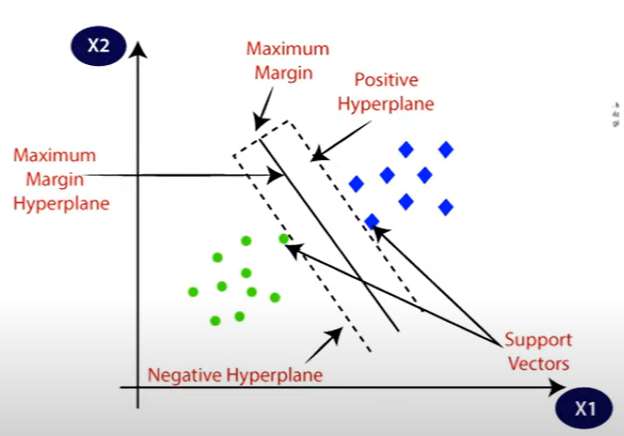 

-  Its a powerful supervised machine learning algorithm used mostly for classification tasks.
-  SVM finds the best boundary (hyperplane) that separates different classes in your data with the maximum possible margin.
-  Positive Hyperplane: Boundary closest to the blue class
-  Negative Hyperplane: Boundary closest to the green class
-  Maximum Margin Hyperplane: The central line (the "ideal" separator) that lies halfway between the positive and negative hyperplanes.This central one is the decision boundary.
-  What are Support Vectors: These are the data points that lie closest to the margin (the dotted lines). They are critical because: They directly affect the position and orientation of the hyperplane. If you remove them, the margin or boundary could shift.


## Flow of the project 
1. Get Diabetes data
2. Data pre processing
3. Train test split
4. Feed the data to svm classifier
5. prediction

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [16]:
diabetes_df.shape

(768, 9)

In [12]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
diabetes_df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [17]:
#Seperating features and target
X = diabetes_df.drop(columns='Outcome',axis=1)
Y = diabetes_df['Outcome']

In [18]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [19]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [21]:
#performing data standardization
scaler = StandardScaler()

In [22]:
scaler.fit(X)

StandardScaler()

In [23]:
standardized_data = scaler.transform(X)

In [24]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [26]:
X = standardized_data
Y = diabetes_df['Outcome']

In [27]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [28]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [32]:
#Training the Model
classifier = svm.SVC(kernel='linear')

In [33]:
#training the support vector machine classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [34]:
#evaluating the model
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,Y_train)

In [35]:
print("Accuracy score of the training data: ",training_data_accuracy)

Accuracy score of the training data:  0.7866449511400652


In [36]:
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,Y_test)

In [38]:
print("Accuracy score of the test data: ",test_data_accuracy)

Accuracy score of the test data:  0.7727272727272727


when the training data accuracy is higher than the test data accuracy its called overfiting

In [47]:
input_data = (1,89,66,23,94,28.1,0.167,21)
input_data_np = np.asarray(input_data)
input_data_np_reshape = input_data_np.reshape(1,-1)

#standardizing the data
input_std_data = scaler.transform(input_data_np_reshape)

prediction = classifier.predict(input_std_data)

if(prediction[0] == 0):
    print("The person is Not Diabetic!")
else:
    print("The person is Diabetic!")

The person is Not Diabetic!


C:\Users\Harshita\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


When you trained (or fitted) the StandardScaler, you probably used a pandas DataFrame with column names (e.g., 'Glucose', 'BMI', etc.)

But during prediction, you passed a NumPy array (which has no column names)

So, StandardScaler is just warning you: "Hey! I'm expecting named features like before, but now I'm seeing a nameless array."

heres how you can silence it:

`columns = diabetes_df.drop('Outcome', axis=1).columns` 

`input_df = pd.DataFrame([input_data], columns=columns)`

`input_std_data = scaler.transform(input_df)`